In [1]:
from google.colab import drive          
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import librosa
import glob 

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [4]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [5]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('/content/drive/MyDrive/CNN_Project/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/CNN_Project/saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

Loaded model from disk


In [6]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/CNN_Project/JE_h07.wav')

Populating the interactive namespace from numpy and matplotlib


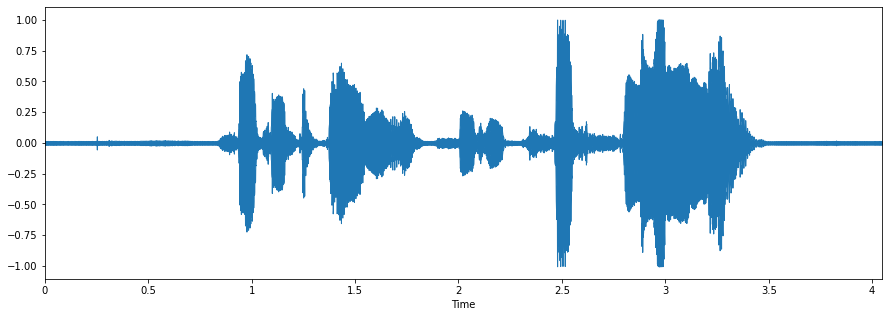

In [7]:
% pylab inline
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [70]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('/content/drive/MyDrive/CNN_Project/JE_h07.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [71]:
livedf2= pd.DataFrame(data=livedf2)

In [72]:
livedf2 = livedf2.stack().to_frame().T

In [73]:
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-25.185495,-25.192522,-25.028606,-23.348738,-23.603191,-24.887747,-22.658854,-23.211428,-25.248116,-24.195906,-24.1938,-24.296368,-24.398182,-25.266775,-23.898251,-23.192501,-23.11445,-23.673939,-22.183302,-22.308567,-23.794483,-25.922926,-25.118965,-24.226025,-24.469574,-24.279949,-24.903231,-24.875919,-25.658339,-24.192003,-19.436235,-19.016651,-20.83157,-20.756193,-21.686703,-23.461304,-17.075583,-10.370953,-8.560646,-9.082469,...,1.067587,-2.11285,-3.516075,-3.289381,-1.974846,-1.565636,1.500619,-0.887753,-6.925507,-8.531144,-9.561081,-12.295793,-14.670351,-16.218174,-15.34688,-11.300039,-11.883732,-13.908436,-16.279434,-16.940651,-14.467141,-9.146766,-8.519263,-9.35898,-10.832037,-10.810466,-10.783973,-10.71638,-10.912706,-11.026075,-11.554167,-10.93902,-11.465322,-11.786259,-12.136158,-13.008602,-11.68313,-10.363415,-2.688015,3.66924


In [74]:
twodim= np.expand_dims(livedf2, axis=2)

In [75]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 16ms/step


In [76]:
livepreds

array([[4.3938166e-29, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.4284997e-07, 1.3506677e-28, 1.0032191e-11,
        9.9999988e-01, 5.1639717e-12]], dtype=float32)

In [77]:
livepreds1=livepreds.argmax(axis=1)

In [78]:
liveabc = livepreds1.astype(int).flatten()

In [79]:
feeling_list=['female_angry','female_calm','female_fearful','female_happy','female_sad','male_angry','male_calm','male_fearful','male_happy','male_sad']

In [80]:
labels = pd.DataFrame(feeling_list)

In [81]:
liveabc

array([8])

In [68]:
labels

,0
0,female_angry
1,female_calm
2,female_fearful
3,female_happy
4,female_sad
5,male_angry
6,male_calm
7,male_fearful
8,male_happy
9,male_sad


In [69]:
lb = LabelEncoder()
lb.fit(labels)

livepredictions = lb.inverse_transform(liveabc)
livepredictions

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['male_happy'], dtype=object)